# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer




# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
dataset_path = '../heart_disease_uci_raw/heart.csv'

try:
    # Membaca dataset
    df = pd.read_csv(dataset_path)
    
    # Menampilkan 5 baris pertama untuk pengecekan
    print("Dataset berhasil dimuat!")
    print(f"Ukuran dataset: {df.shape[0]} baris, {df.shape[1]} kolom")
    display(df.head())

except FileNotFoundError:
    print(f"Error: File tidak ditemukan di {dataset_path}.")
    print("Pastikan path file sudah benar dan file sudah di-upload.")

Dataset berhasil dimuat!
Ukuran dataset: 920 baris, 16 kolom


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB

=== Statistik Deskriptif ===


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000



=== Cek Missing Values ===
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

=== Nama Kolom ===
Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


C:\Users\Athar\AppData\Local\Temp\ipykernel_20268\2882005962.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=df, palette='viridis')


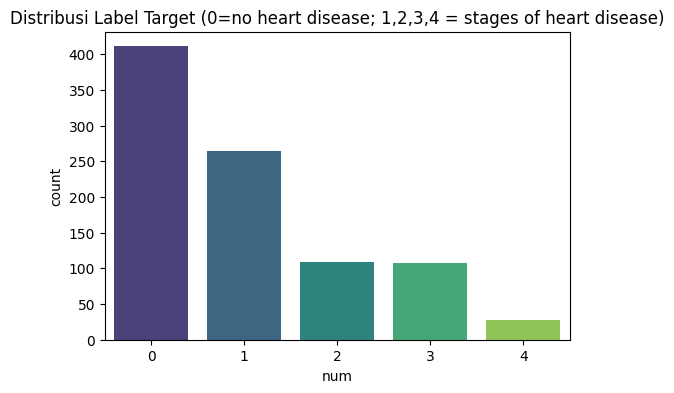

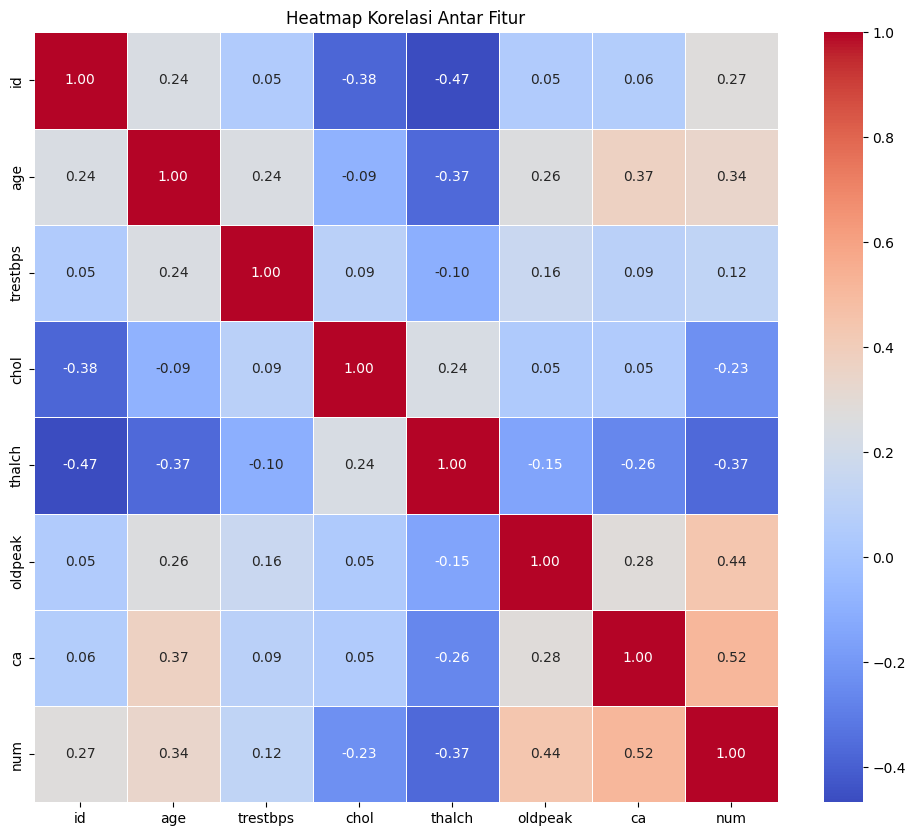

In [3]:
# 1. Cek Informasi Dasar (Tipe Data & Null)
print("=== Info Dataset ===")
df.info()

# 2. Cek Statistik Deskriptif (Mean, Min, Max, dll)
print("\n=== Statistik Deskriptif ===")
display(df.describe())

# 3. Cek Missing Values
print("\n=== Cek Missing Values ===")
print(df.isnull().sum())

# 4. Visualisasi Target (Apakah seimbang atau imbalance?)
# Pastikan nama kolom target sesuai. Di dataset Heart Disease UCI biasanya bernama 'target' atau 'output'.
# Kita cek nama kolom dulu
print("\n=== Nama Kolom ===")
print(df.columns)

target_col = 'num' # Target [0=no heart disease; 1,2,3,4 = stages of heart disease ]
#
if target_col in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=target_col, data=df, palette='viridis')
    plt.title('Distribusi Label Target (0=no heart disease; 1,2,3,4 = stages of heart disease)')
    plt.show()
else:
    print(f"Kolom '{target_col}' tidak ditemukan. Mohon cek nama kolom output.")

# 5. Visualisasi Korelasi (Heatmap)
# Melihat hubungan antar variabel
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

# **5. Data Preprocessing**

In [4]:
# A. CLEANING AWAL
# ----------------
df_clean = df.copy()

# 1. Ubah Target menjadi Binary (0 = Sehat, 1 = Sakit Jantung)
# Nilai 1, 2, 3, 4 dianggap '1' (Sakit)
df_clean['num'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)

# 2. Buang kolom yang tidak perlu atau terlalu banyak missing values (>50%)
# 'id', 'dataset': Identitas (tidak guna untuk prediksi)
# 'ca', 'thal', 'slope': Missing value terlalu banyak (lihat hasil EDA)
cols_to_drop = ['id', 'dataset', 'ca', 'thal', 'slope']
df_clean = df_clean.drop(columns=cols_to_drop)

print("Ukuran dataset setelah cleaning awal:", df_clean.shape)

# B. DATA SPLITTING
# -----------------
X = df_clean.drop(columns=['num'])
y = df_clean['num']

# Split 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah Data Train: {X_train.shape[0]}")
print(f"Jumlah Data Test: {X_test.shape[0]}")

# C. MEMBUAT PIPELINE PREPROCESSING
# ---------------------------------
# Kita pisahkan kolom berdasarkan tipenya
numeric_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang']

# Pipeline untuk Data Numerik:
# 1. Isi missing value dengan Median
# 2. Standarisasi skala (StandardScaler)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk Data Kategorikal:
# 1. Isi missing value dengan Modus (most_frequent)
# 2. Ubah teks jadi angka (OneHotEncoder)
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan keduanya
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# D. TERAPKAN PIPELINE
# --------------------
# Fit hanya pada training data untuk mencegah data leakage
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Ambil nama fitur baru setelah OneHotEncoding (untuk keperluan display saja)
# Ini agak tricky, tapi berguna untuk melihat hasil
ohe_feature_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
all_feature_names = numeric_features + list(ohe_feature_names)

# Konversi kembali ke DataFrame agar enak dilihat
X_train_df = pd.DataFrame(X_train_processed, columns=all_feature_names)
X_test_df = pd.DataFrame(X_test_processed, columns=all_feature_names)

print("\n=== Contoh Data Siap Latih (X_train) ===")
display(X_train_df.head())

# E. SIMPAN DATASET HASIL PREPROCESSING
y_train_reset = y_train.reset_index(drop=True)
y_test_reset = y_test.reset_index(drop=True)

# Masukkan kembali target ke dataframe
X_train_df['num'] = y_train_reset
X_test_df['num'] = y_test_reset

# Simpan ke file CSV
X_train_df.to_csv('train_processed.csv', index=False)
X_test_df.to_csv('test_processed.csv', index=False)

print("\nDataset hasil preprocessing berhasil disimpan!")
print("File: 'train_processed.csv' dan 'test_processed.csv' telah dibuat.")

Ukuran dataset setelah cleaning awal: (920, 11)
Jumlah Data Train: 736
Jumlah Data Test: 184

=== Contoh Data Siap Latih (X_train) ===


,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina,fbs_False,fbs_True,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,exang_False,exang_True
0,0.902413,-0.083946,-0.262281,-0.694187,1.983624,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.034776,0.987771,0.214811,-0.614999,-0.794406,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290587,-0.083946,1.288270,0.097694,-0.331401,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.399042,-0.619805,0.187287,0.810387,0.687210,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,-0.182133,-0.619805,1.159822,1.364703,-0.609204,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0



Dataset hasil preprocessing berhasil disimpan!
File: 'train_processed.csv' dan 'test_processed.csv' telah dibuat.
